In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# DATA CLEANING

In [4]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [5]:
train.shape

(23524, 13)

In [6]:
train.drop_duplicates(inplace = True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [8]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
train.shape

(23524, 13)

In [10]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# EDA

In [15]:
train.shape

(23524, 13)

In [16]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## 1. what is the distribution of individuals having a  bank account?

Text(0.5, 1.0, 'Distribution of bank account across country')

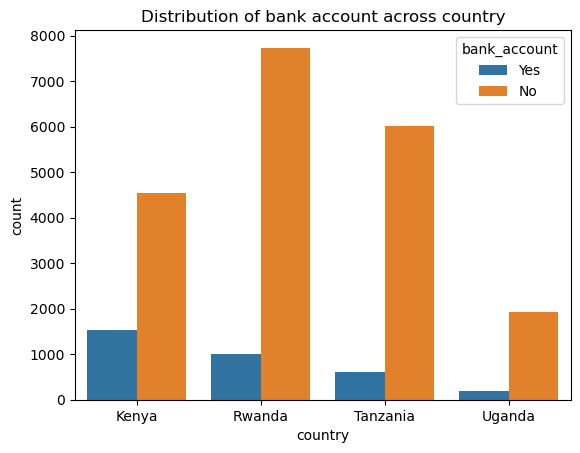

In [11]:
#plot to visualize the distribution of bank account
sns.countplot(x = "country", hue = "bank_account", data = train)
plt.title("Distribution of bank account across country")

In [26]:
# train["location_type"] = train["location_type"].map({"Rural" : 1, "Urban" : 0})
# train["cellphone_access"] = train["cellphone_access"]. map({"Yes" :1, "No": 0})
# train["gender_of_respondent"] = train["gender_of_respondent"]. map({"Female" :1, "Male": 0})

#train = pd.get_dummies(train, columns = ["relationshhip_with_head", "marital_status", "education_level", "job_type"])

Text(0.5, 1.0, 'Distribution of bank accounts across Education Level')

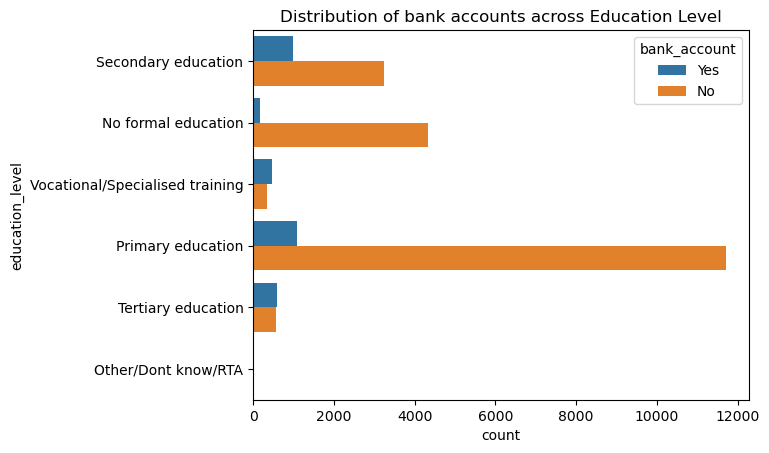

In [27]:
sns.countplot (y = "education_level", hue = "bank_account", data = train)
plt.title("Distribution of bank accounts across Education Level")

univariate analysis

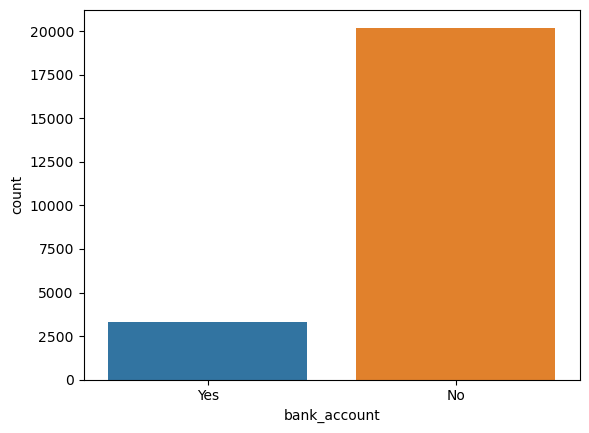

Percentage of individuals with a bank account: 14.08%
Percentage of individuals without a bank account: 85.92%


In [17]:
# Count the number of observations in each category of the target variable
sns.countplot(x="bank_account", data=train)
plt.show()

# Calculate the percentage of individuals with and without a bank account
bank_acc_count = train['bank_account'].value_counts()
print("Percentage of individuals with a bank account: {:.2f}%".format(bank_acc_count[1]/sum(bank_acc_count)*100))
print("Percentage of individuals without a bank account: {:.2f}%".format(bank_acc_count[0]/sum(bank_acc_count)*100))

In [18]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
demographic_features = ['country', 'year',  'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']

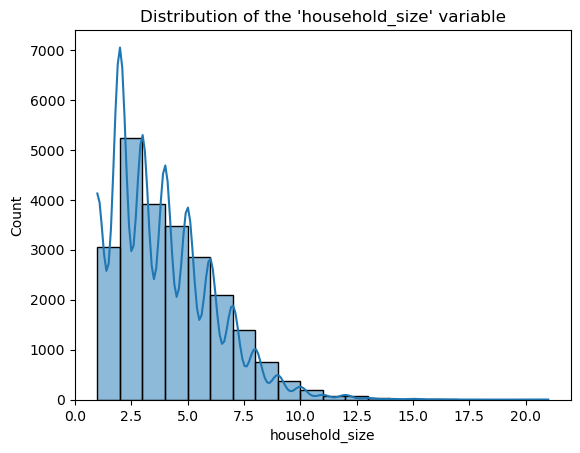

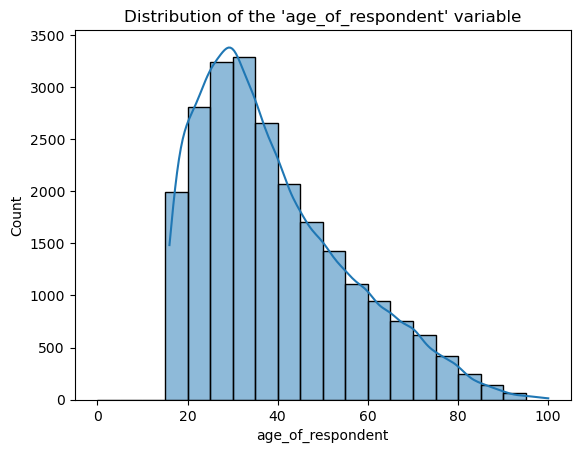

In [19]:
# Plot the distribution of the 'household_size' variable
sns.histplot(x="household_size", data=train, bins=range(1, 20), kde=True)
plt.title("Distribution of the 'household_size' variable")
plt.show()

# Plot the distribution of the 'age_of_respondent' variable
sns.histplot(x="age_of_respondent", data= train, bins=range(0, 100, 5), kde=True)
plt.title("Distribution of the 'age_of_respondent' variable")
plt.show()

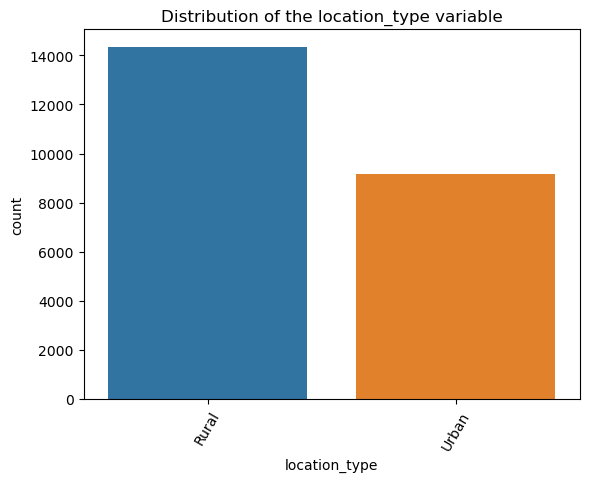

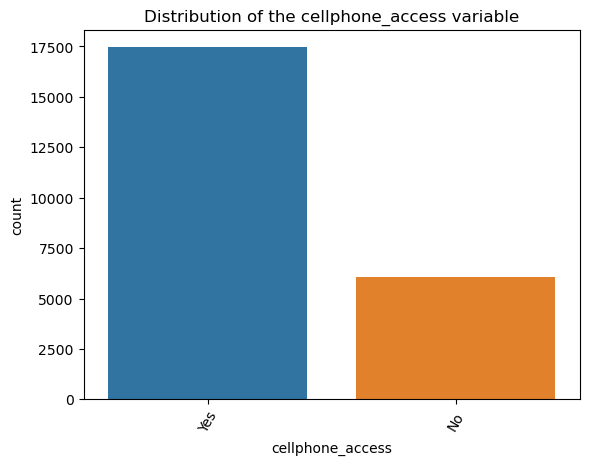

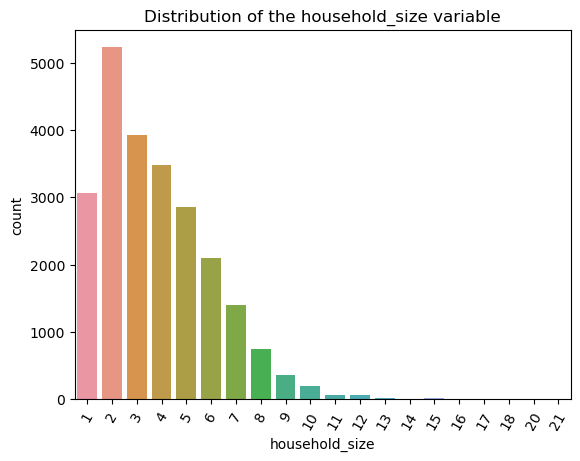

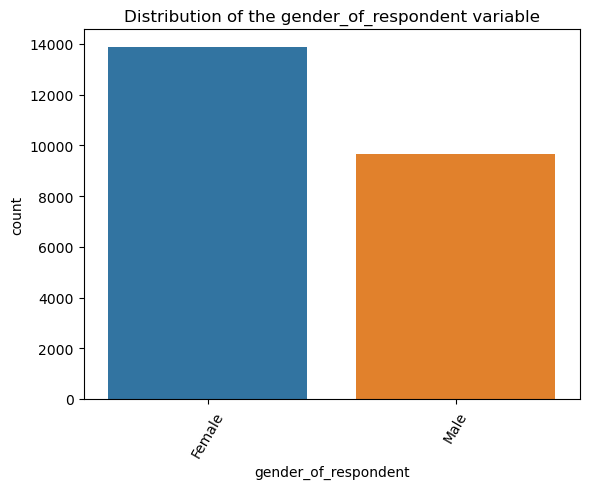

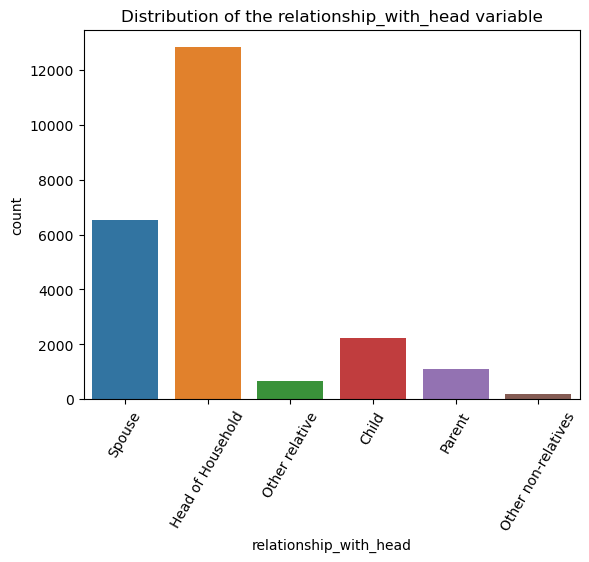

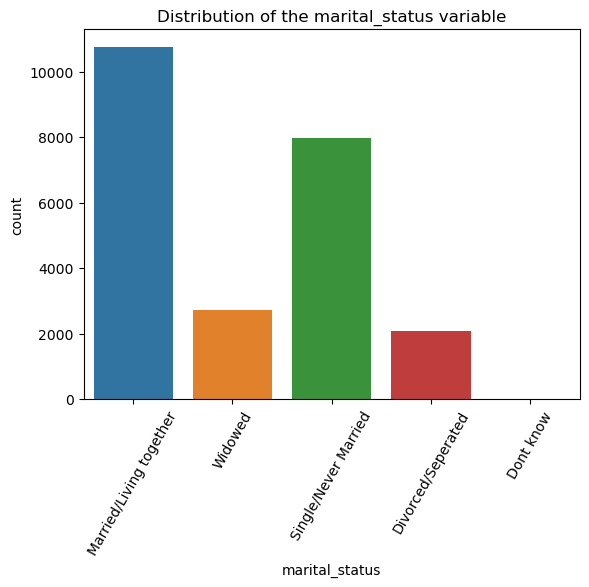

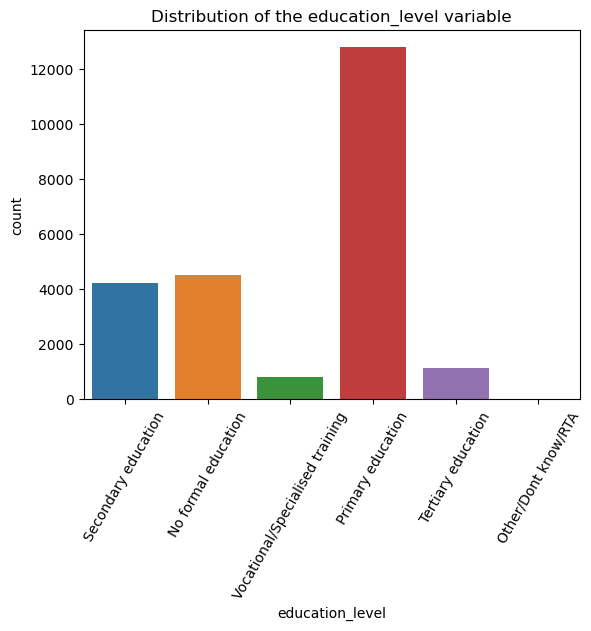

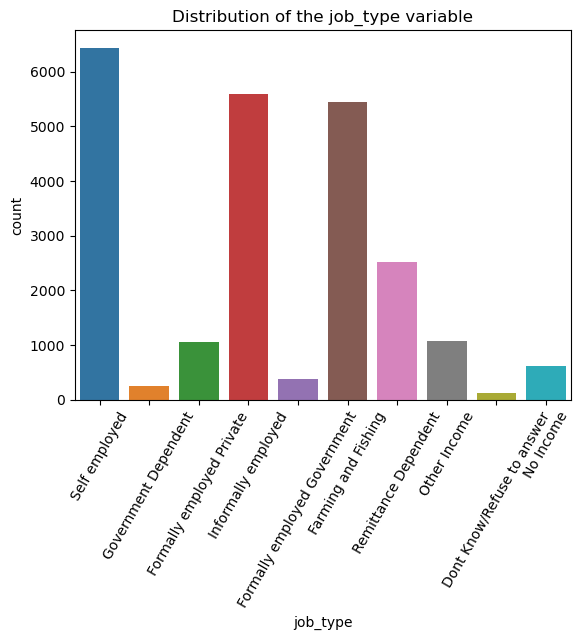

In [21]:
def make_countplot(column_name):
    sns.countplot(x=column_name, data=train)
    plt.title(f"Distribution of the {column_name} variable")
    plt.xticks(rotation=60)
    plt.show()
    
    
demographic_feature = ["location_type", "cellphone_access", "household_size", 
                       "gender_of_respondent", "relationship_with_head", 
                        "marital_status", "education_level", "job_type"]

for column in demographic_feature:
    make_countplot(column)


In [22]:
train[train['bank_account'] == "Yes"]['location_type'].value_counts()

Rural    1671
Urban    1641
Name: location_type, dtype: int64

### Question 1: What is the relationship between location type and having a bank account?

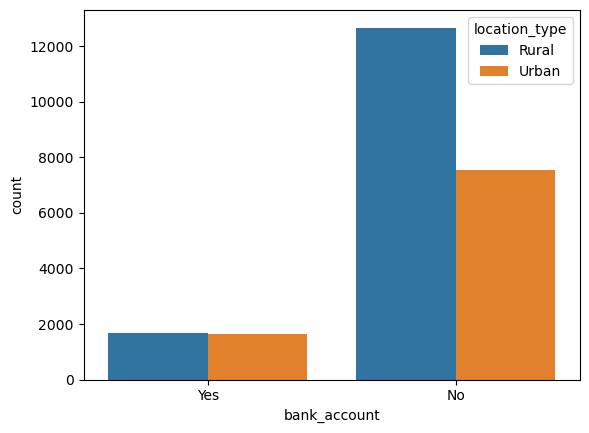

Percentage of individuals with a bank account in rural areas: 11.65%
Percentage of individuals with a bank account in urban areas: 17.87%


In [24]:
# Plot the distribution of the target variable with respect to the 'location_type' variable
sns.countplot(x="bank_account", hue="location_type", data=train)
plt.show()

# Calculate the percentage of individuals with a bank account in rural and urban areas
rural_bank_acc_count = train[train['location_type'] == 'Rural']['bank_account'].value_counts()
urban_bank_acc_count = train[train['location_type'] == 'Urban']['bank_account'].value_counts()
print("Percentage of individuals with a bank account in rural areas: {:.2f}%".format(
    rural_bank_acc_count[1]/sum(rural_bank_acc_count)*100))
print("Percentage of individuals with a bank account in urban areas: {:.2f}%".format(
    urban_bank_acc_count[1]/sum(urban_bank_acc_count)*100))

### people in urban area are more likey to have an account

In [25]:
train[train.age_of_respondent > 80] .head(20)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
137,Kenya,2018,uniqueid_138,No,Urban,Yes,4,81,Male,Head of Household,Married/Living together,No formal education,Remittance Dependent
209,Kenya,2018,uniqueid_210,No,Rural,No,3,95,Female,Parent,Widowed,No formal education,Informally employed
268,Kenya,2018,uniqueid_269,No,Urban,Yes,1,85,Female,Head of Household,Widowed,Primary education,Remittance Dependent
340,Kenya,2018,uniqueid_341,No,Rural,No,2,95,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
366,Kenya,2018,uniqueid_367,No,Rural,No,1,86,Female,Head of Household,Widowed,Primary education,Remittance Dependent
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3,95,Male,Head of Household,Married/Living together,Primary education,Other Income
472,Kenya,2018,uniqueid_473,No,Rural,No,1,85,Male,Head of Household,Widowed,No formal education,Government Dependent
483,Kenya,2018,uniqueid_484,No,Rural,No,1,93,Female,Head of Household,Widowed,No formal education,Government Dependent
517,Kenya,2018,uniqueid_518,No,Rural,Yes,3,85,Female,Head of Household,Widowed,No formal education,Farming and Fishing
638,Kenya,2018,uniqueid_639,No,Rural,No,4,88,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing


### Question 2: What is the relationship between cellphone access and having a bank account?

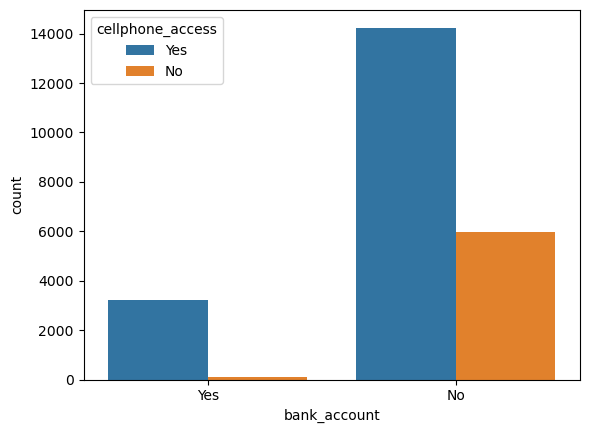

Percentage of individuals with a bank account who have access to a cellphone: 96.86%
Percentage of individuals without a bank account who have access to a cellphone: 70.48%


In [28]:
# Plot the distribution of the target variable with respect to the 'cellphone_access' variable
sns.countplot(x="bank_account", hue="cellphone_access", data=train)
plt.show()

# Calculate the percentage of individuals with a bank account who have access to a cellphone
bank_acc_with_cell_count = train[train['bank_account'] == "Yes"]['cellphone_access'].value_counts()
print("Percentage of individuals with a bank account who have access to a cellphone: {:.2f}%".format(
    bank_acc_with_cell_count['Yes']/sum(bank_acc_with_cell_count)*100))

# Calculate the percentage of individuals without a bank account who have access to a cellphone
no_bank_acc_with_cell_count = train[train['bank_account'] == "No"]['cellphone_access'].value_counts()
print("Percentage of individuals without a bank account who have access to a cellphone: {:.2f}%".format(
    no_bank_acc_with_cell_count['Yes']/sum(no_bank_acc_with_cell_count)*100))


### people that have acces to phone are more likely to have an account

### Question 3: What is the relationship between education level and having a bank account?


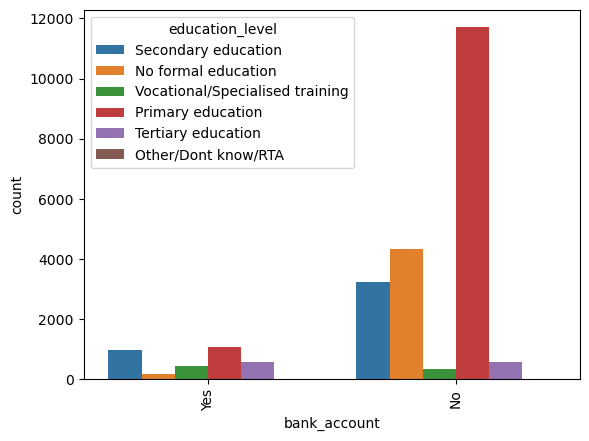

Percentage of individuals with a bank account who have different levels of education:
Primary education                  33.001208
Secondary education                29.679952
Tertiary education                 17.844203
Vocational/Specialised training    13.828502
No formal education                 5.314010
Other/Dont know/RTA                 0.332126
Name: education_level, dtype: float64

Percentage of individuals without a bank account who have different levels of education:
Primary education                  57.876509
No formal education                21.467445
Secondary education                16.030081
Tertiary education                  2.800317
Vocational/Specialised training     1.706907
Other/Dont know/RTA                 0.118741
Name: education_level, dtype: float64


In [30]:
# Plot the distribution of the target variable with respect to the 'education_level' variable
sns.countplot(x="bank_account", hue="education_level", data=train)
plt.xticks(rotation=90)
plt.show()

# Calculate the percentage of individuals with a bank account who have different levels of education
bank_acc_education_count = train[train['bank_account'] == "Yes"]['education_level'].value_counts()
bank_acc_education_pct = bank_acc_education_count / bank_acc_education_count.sum() * 100
print("Percentage of individuals with a bank account who have different levels of education:")
print(bank_acc_education_pct, end="\n\n")

# Calculate the percentage of individuals without a bank account who have different levels of education
no_bank_acc_education_count = train[train['bank_account'] == "No"]['education_level'].value_counts()
no_bank_acc_education_pct = no_bank_acc_education_count / no_bank_acc_education_count.sum() * 100
print("Percentage of individuals without a bank account who have different levels of education:")
print(no_bank_acc_education_pct)


# Modelling
1. classification
2. regression


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.0+ MB


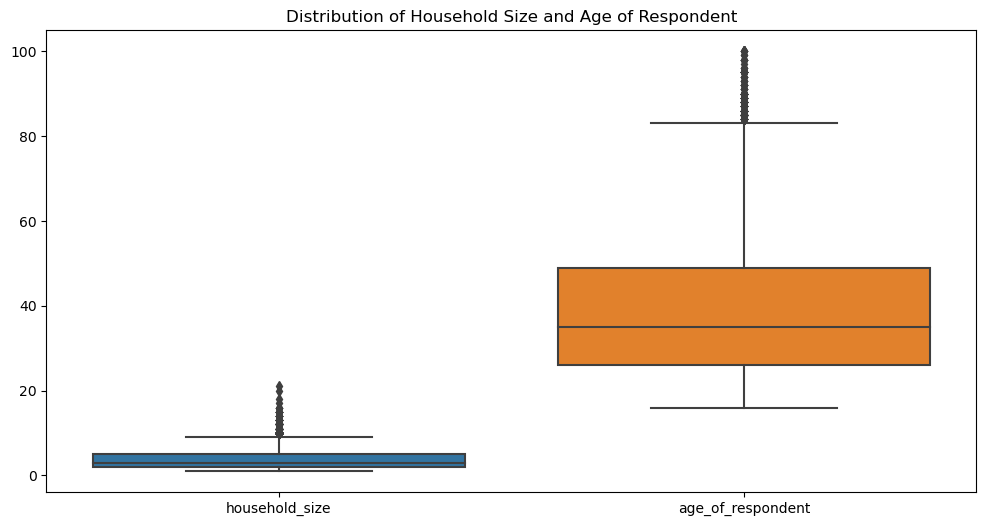

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[["household_size", "age_of_respondent"]])
plt.title("Distribution of Household Size and Age of Respondent")
plt.show()

using label encoder to model the data
1. call the function
2. fit the model -- overfitting, underfitting and generalized
3. and transform the model

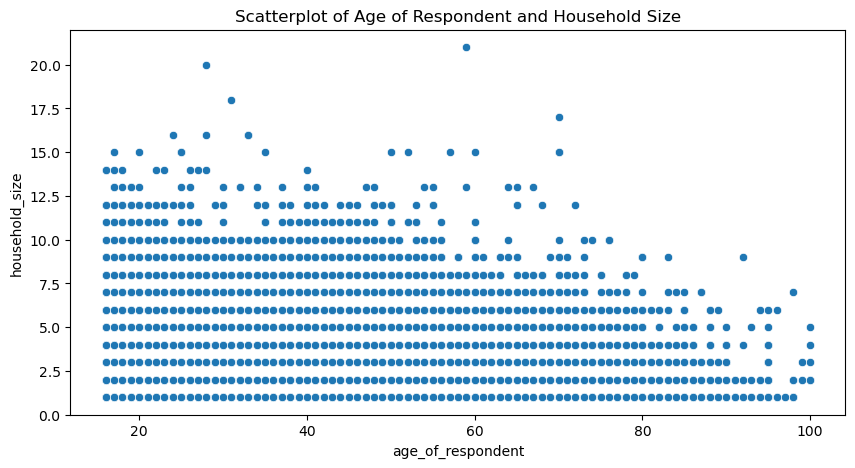

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="age_of_respondent", y="household_size", data=train)
plt.title("Scatterplot of Age of Respondent and Household Size")
plt.show()


# Modelling

In [36]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
target = "bank_account"

In [39]:
cat_cols = list(train.select_dtypes(include='object').columns)

In [40]:
cat_cols

['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [41]:
cat_cols = [col for col in cat_cols if col not in ["uniqueid", target]]

In [42]:
cat_cols

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

### Encode the categorical variables using LabelEncoder:


In [44]:
label_encoder = LabelEncoder()

for col in cat_cols:
        train[col] = label_encoder.fit_transform(train[col])

In [45]:
X = train.drop(['bank_account','uniqueid'], axis=1)
y = train[target]

label_dict = {"Yes": 1, "No": 0}
y = y.map(label_dict)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                   random_state=42, stratify=y)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int32
 1   year                    23524 non-null  int64
 2   location_type           23524 non-null  int32
 3   cellphone_access        23524 non-null  int32
 4   household_size          23524 non-null  int64
 5   age_of_respondent       23524 non-null  int64
 6   gender_of_respondent    23524 non-null  int32
 7   relationship_with_head  23524 non-null  int32
 8   marital_status          23524 non-null  int32
 9   education_level         23524 non-null  int32
 10  job_type                23524 non-null  int32
dtypes: int32(8), int64(3)
memory usage: 1.9 MB


### Train Model

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
lr_pred = lr_model.predict(X_test)

print(f"Accuracy :{ accuracy_score(lr_pred, y_test) * 100}")
print(f"Precision :{ precision_score(lr_pred, y_test) * 100}")


Accuracy :87.56641870350691


NameError: name 'precision_score' is not defined

# Confusion Matrix

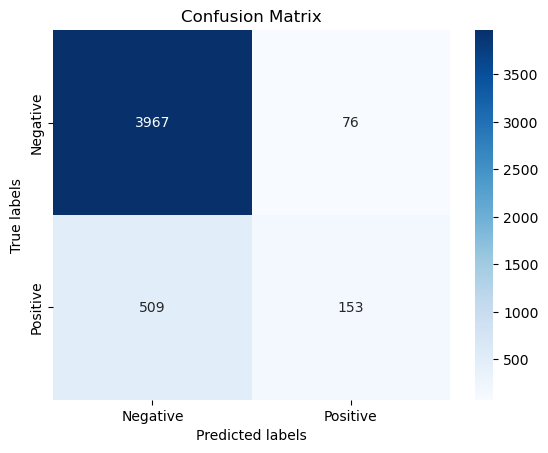

In [50]:
cm = confusion_matrix(y_test, lr_pred)

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# Show plot
plt.show()